## Walmart weekly Sales Prediction Experiment using various ML models

### Import basic libraries for data manipulation and visualization

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

##### Read data into a pandas dataframe

In [6]:
data = pd.read_csv('Walmart Data Set Final Version 2.1.csv')

In [7]:
data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales
0,Store1,Dept1,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,24924.50
1,Store1,Dept2,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,50605.27
2,Store1,Dept3,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,13740.12
3,Store1,Dept4,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,39954.04
4,Store1,Dept5,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,32229.38


#### Describe the data set to understand the different data points

In [94]:
data.describe()

,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales
count,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,15981.258123
std,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,22711.183519
min,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,-4988.940000
25%,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,2079.650000
50%,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,7612.030000
75%,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,20205.852500
max,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,693099.360000


#### Determine Numeric and Categorical variables

In [95]:
numeric_var = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]

#Numerical Data
train_num=data[numeric_var]

#Categorical Data
train_cat=data[cat_var]

In [96]:
print (numeric_var)
print (cat_var)

['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Weekly_Sales']
['Store', 'Dept', 'Date', 'Type']


#### Looking into top 6 dataset rows

In [97]:
data.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales
0,Store1,Dept1,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,24924.50
1,Store1,Dept2,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,50605.27
2,Store1,Dept3,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,13740.12
3,Store1,Dept4,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,39954.04
4,Store1,Dept5,2/5/2010,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,32229.38


#### Import LabelEncoder to replace strings from categorical variables to numeric values.

In [7]:
from sklearn.preprocessing import LabelEncoder

In [129]:
lb_enc = LabelEncoder()
data['Dept_code'] = lb_enc.fit_transform(data['Dept']) # will add new column as Dept_code with numeric values of Dept
data['Store_code'] = lb_enc.fit_transform(data['Store'])
data['Type_code'] = lb_enc.fit_transform(data['Type'])

data['Dept_code'].head()

0     0
1    10
2    21
3    32
4    43
Name: Dept_code, dtype: int64

In [87]:
#data[['Dept','Dept_code']].head(10) # To see the one to one mapping of string to changed numeric values

In [130]:
data.drop(['Store','Dept','Type'],axis = 1, inplace = True) # droping categorical values

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
Store           421570 non-null object
Dept            421570 non-null object
Date            421570 non-null object
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
Weekly_Sales    421570 non-null float64
Dept_code       421570 non-null int64
Store_code      421570 non-null int64
Type_code       421570 non-null int64
dtypes: bool(1), float64(10), int64(4), object(4)
memory usage: 58.3+ MB


#### Converting Date field to Datetime so that we can easily extract week no, day, date and year from date and make them as new columns

In [131]:
data['Date'] = pd.to_datetime(data['Date'])

In [132]:
# Extract date features
data['Date_dayofweek'] =data['Date'].dt.dayofweek
data['Date_month'] =data['Date'].dt.month 
data['Date_year'] =data['Date'].dt.year
data['Date_day'] =data['Date'].dt.day 

#### checking for missing values

In [133]:
data.isnull().sum()

Date                   0
IsHoliday              0
Temperature            0
Fuel_Price             0
MarkDown1         270889
MarkDown2         310322
MarkDown3         284479
MarkDown4         286603
MarkDown5         270138
CPI                    0
Unemployment           0
Size                   0
Weekly_Sales           0
Dept_code              0
Store_code             0
Type_code              0
Date_dayofweek         0
Date_month             0
Date_year              0
Date_day               0
dtype: int64

From above result, we can see only Markdowns have missing values

#### Filling missing values 

In [134]:
data.fillna(0,inplace = True) #filling all null markdown as 0

#### visualize the correlation matrix

In [135]:
import seaborn as sns

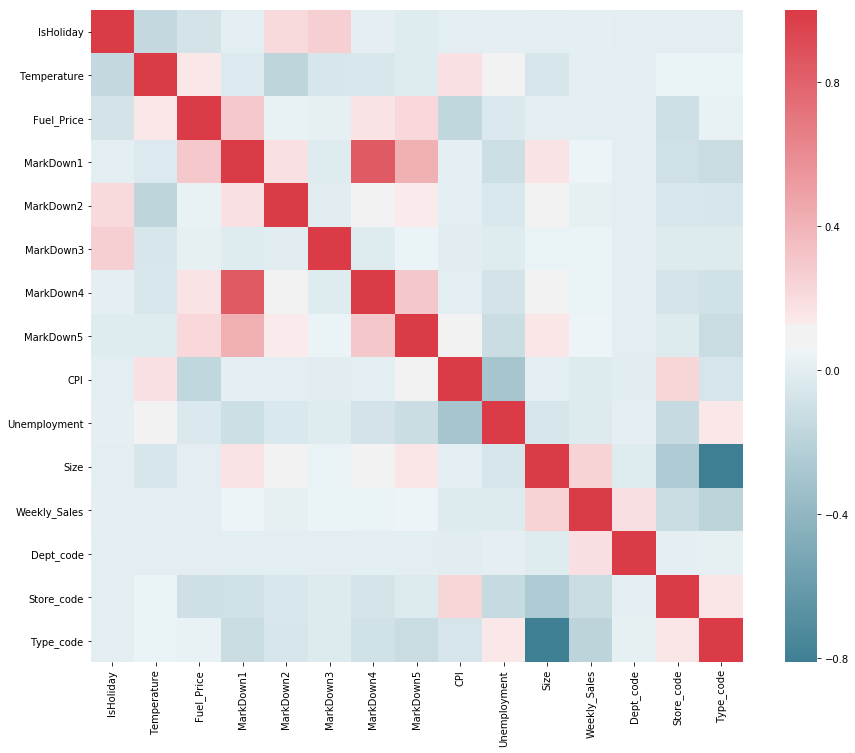

In [109]:
f, ax = plt.subplots(figsize=(15, 12))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

There is significant positive correlation between size of dept and weekly sales
other variably are not highly correlated

## Plot Weekly Sales

In [2]:
#f,ax = plt.subplots(figsize=(15, 12))
#sns.distplot(data.Weekly_Sales,ax=ax)

#### Store Size vs Weekly Sales

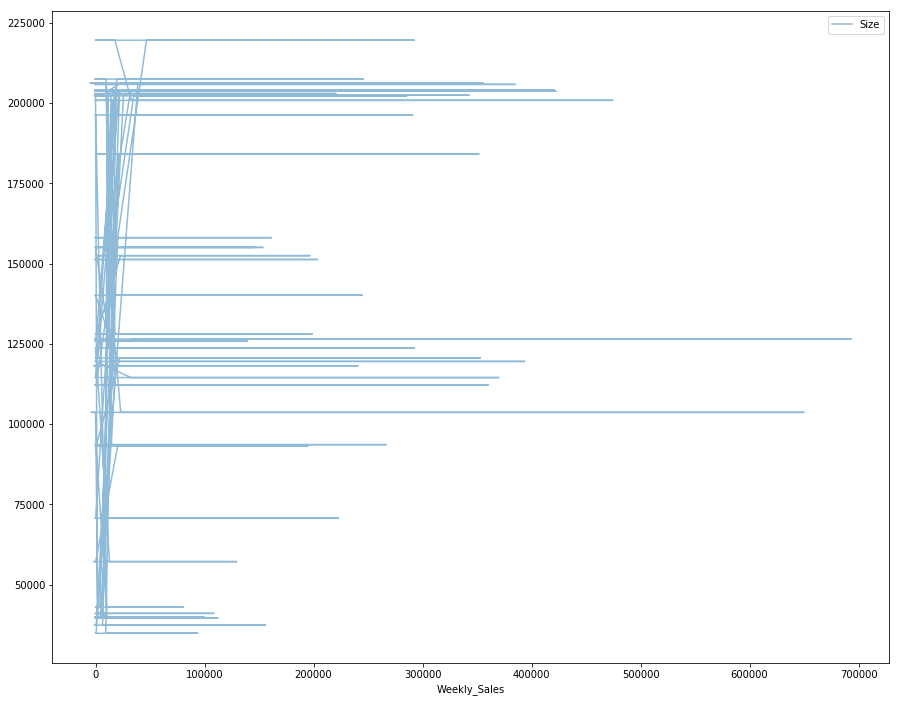

In [137]:
f,ax = plt.subplots(figsize=(15, 12))
data.plot(kind='line', x='Weekly_Sales', y='Size', alpha=1.5,ax=ax)

## Outlier Analysis

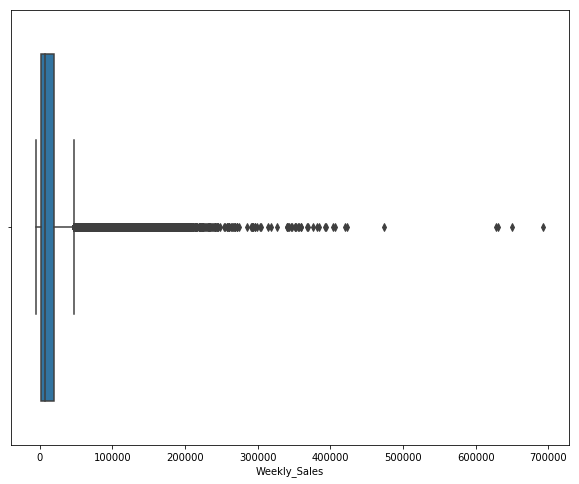

In [139]:
f,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=data['Weekly_Sales'],ax=ax)

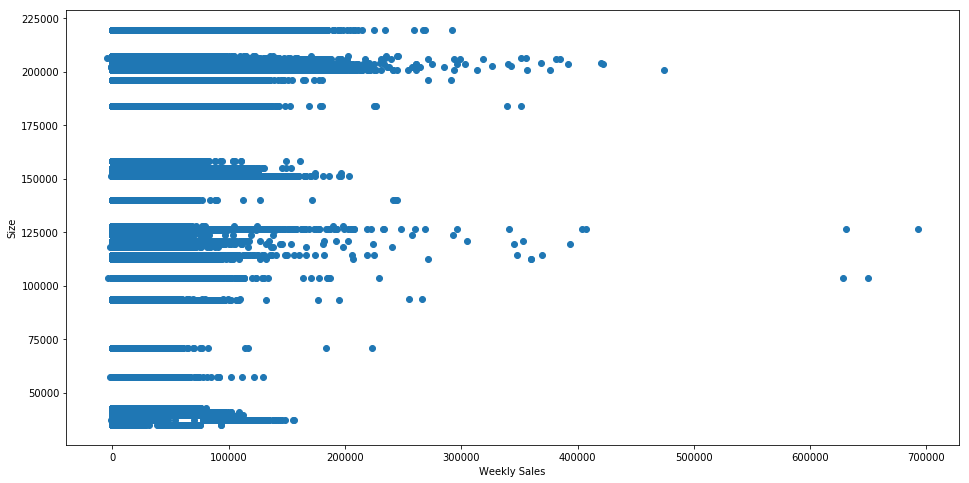

In [141]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Weekly_Sales'], data['Size'])
ax.set_xlabel('Weekly Sales')
ax.set_ylabel('Size')
plt.show()

In [ ]:
#### from above box plot and scatter plot, weekly sale greater than 200000 considered as outlier hence setting it to 100000

In [142]:
data.Weekly_Sales=np.where(data.Weekly_Sales>200000, 200000,data.Weekly_Sales) 

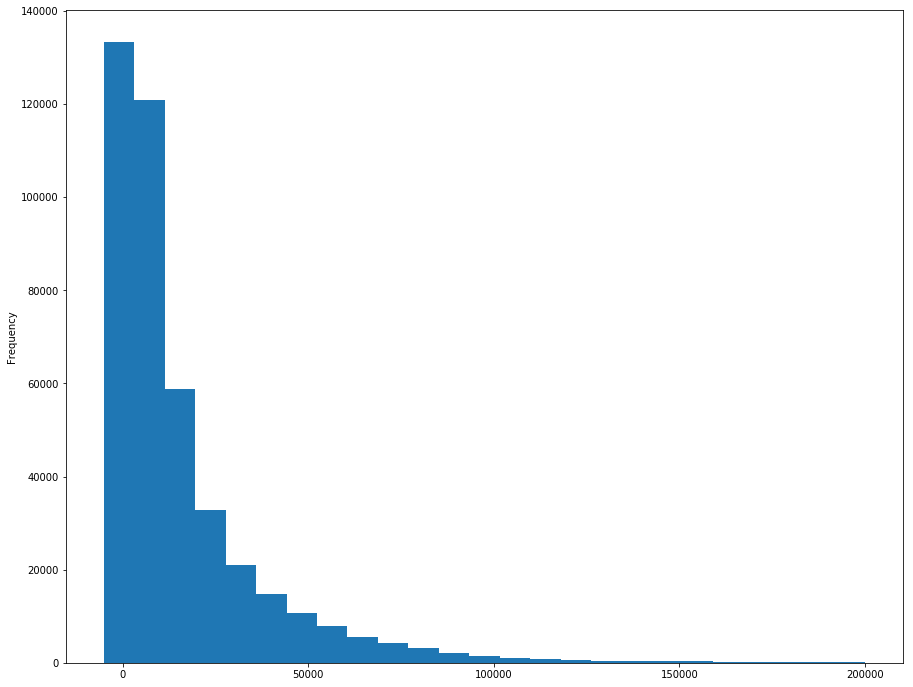

In [143]:
f,ax = plt.subplots(figsize=(15, 12))
data.Weekly_Sales.plot.hist(bins=25,ax=ax)

#### again from above graph we can make all sales greater than 100000 equal to 100000 by treating them as outliers

In [144]:
data.Weekly_Sales=np.where(data.Weekly_Sales>100000, 100000,data.Weekly_Sales) 

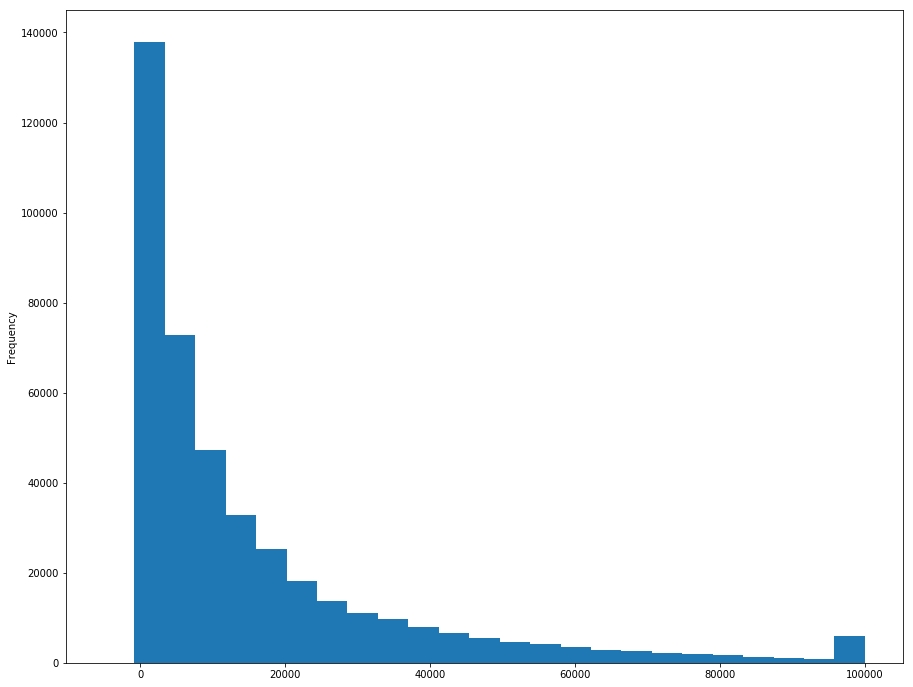

In [145]:
f,ax = plt.subplots(figsize=(15, 12))
data.Weekly_Sales.plot.hist(bins=25,ax=ax)

In [146]:
type_mapping = {False: 0, True: 1}
data['IsHoliday'] = data['IsHoliday'].map(type_mapping)

In [19]:
data.head()

,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales,Dept_code,Store_code,Type_code,Date_dayofweek,Date_month,Date_year,Date_day
0,2010-02-05,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,24924.50,0,0,0,4,2,2010,5
1,2010-02-05,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,50605.27,10,0,0,4,2,2010,5
2,2010-02-05,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,13740.12,21,0,0,4,2,2010,5
3,2010-02-05,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,39954.04,32,0,0,4,2,2010,5
4,2010-02-05,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,32229.38,43,0,0,4,2,2010,5


In [147]:
from datetime import datetime

In [148]:
data['Super_Bowl'] = np.where((data['Date']==datetime(2010, 2, 7)) | (data['Date']==datetime(2011, 2, 7)) | (data['Date']==datetime(2012, 2, 6)) | (data['Date']==datetime(2013, 2, 4)),1,0)
data['Labour_Day'] = np.where((data['Date']==datetime(2010, 9, 6)) | (data['Date']==datetime(2011, 9, 5)) | (data['Date']==datetime(2012, 9, 3)) | (data['Date']==datetime(2013, 8, 30)),1,0)
data['Thanksgiving'] = np.where((data['Date']==datetime(2010, 11, 25)) | (data['Date']==datetime(2011, 11, 24)) | (data['Date']==datetime(2012, 11, 22)) | (data['Date']==datetime(2013, 11, 28)),1,0)
data['Christmas'] = np.where((data['Date']==datetime(2010, 12, 25)) | (data['Date']==datetime(2011, 12, 25)) | (data['Date']==datetime(2012, 12, 25)) | (data['Date']==datetime(2013, 12, 25)),1,0)


In [149]:
# Altering the isHoliday value depending on these new holidays...
data['IsHoliday']=data['IsHoliday']|data['Super_Bowl']|data['Labour_Day']|data['Thanksgiving']|data['Christmas']

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 24 columns):
Date              421570 non-null datetime64[ns]
IsHoliday         421570 non-null int64
Temperature       421570 non-null float64
Fuel_Price        421570 non-null float64
MarkDown1         421570 non-null float64
MarkDown2         421570 non-null float64
MarkDown3         421570 non-null float64
MarkDown4         421570 non-null float64
MarkDown5         421570 non-null float64
CPI               421570 non-null float64
Unemployment      421570 non-null float64
Size              421570 non-null int64
Weekly_Sales      421570 non-null float64
Dept_code         421570 non-null int64
Store_code        421570 non-null int64
Type_code         421570 non-null int64
Date_dayofweek    421570 non-null int64
Date_month        421570 non-null int64
Date_year         421570 non-null int64
Date_day          421570 non-null int64
Super_Bowl        421570 non-null int32
Labour_Day        42

In [151]:
print (data.Christmas.value_counts())
print (data['Super_Bowl'].value_counts())
print (data['Thanksgiving'].value_counts())
print (data['Labour_Day'].value_counts())

0    421570
Name: Christmas, dtype: int64
0    421570
Name: Super_Bowl, dtype: int64
0    421570
Name: Thanksgiving, dtype: int64
0    421570
Name: Labour_Day, dtype: int64


In [152]:
# Now remove these holidays extra variables, as we have updated IsHoliday already
dp=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']
data.drop(dp,axis=1,inplace=True)


In [153]:
data.drop(['Date'], axis=1,inplace = True)


In [154]:

X=data.drop(['Weekly_Sales'], axis=1)

y=data['Weekly_Sales'] 


In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Multiple Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_linear=mlr.predict(X_test)
acc_linear= mlr.score(X_train, y_train)
print (acc_linear)

0.10884106494327839


In [159]:
mlr.score(X_train, y_train) * 100

10.884106494327838

In [160]:
mlr.score(X_train, y_train) #r square

0.10884106494327839

In [161]:
mlr.score(X_test, y_test)

0.1093408200762821

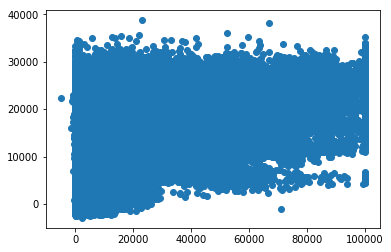

In [164]:
plt.scatter(y_test,y_pred_linear)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
mse = mean_squared_error(y_test, y_pred_linear)
r_squared = r2_score(y_test, y_pred_linear)
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 376994648.37759554
Root_Mean_Squared_Error : 19416.350027170287
r_square_value : 0.11023270843671662


## Random Forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test)
acc_rf = rf.score(X_train, y_train)

In [166]:
print (acc_rf*100)

99.70987383369288


## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
dt = DecisionTreeRegressor()
dt . fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt= dt.score(X_train, y_train)

In [165]:
print(acc_dt*100)

100.0


## Model Comparision 

In [68]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    
    'Score': [acc_linear*100, acc_rf*100,acc_dt*100]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
2,Decision Tree,100.000000
1,Random Forest,99.709874
0,Linear Regression,10.884106


## Prediction using Random Forest

In [167]:
# Prediction value using Random Forest model..
prediction_rf = pd.DataFrame({
        "Store_Dept_Date": X_test.Store_code.astype(str)+'_'+X_test.Dept_code.astype(str)+'_' + X_test.Date_year.astype(str)
    +'-' + X_test.Date_month.astype(str) + '-' +  X_test.Date_day.astype(str),
        "Weekly_Sales": y_pred_rf
    })
# print the result in csv file
prediction_rf.to_csv('weekly_sales predicted using rf.csv', index=False)

In [168]:
prediction_rf.head()

,Store_Dept_Date,Weekly_Sales
233571,16_67_2011-11-18,3406.5576
88992,1_76_2010-6-18,87843.6560
367842,32_69_2011-12-16,7332.7387
184359,10_10_2012-1-13,46654.9802
26175,22_27_2011-10-28,1312.7634


## Prediction using Decision Tree

In [169]:
# Prediction value using Decision Tree model..
prediction_dt = pd.DataFrame({
        "Store_Dept_Date": X_test.Store_code.astype(str)+'_'+X_test.Dept_code.astype(str)+'_' + X_test.Date_year.astype(str)
    +'-' + X_test.Date_month.astype(str) + '-' +  X_test.Date_day.astype(str),
        "Weekly_Sales": y_pred_dt
    })

prediction_dt.to_csv('weekly_sales predicted using dt.csv', index=False)

In [170]:
prediction_dt.head()

,Store_Dept_Date,Weekly_Sales
233571,16_67_2011-11-18,2961.21
88992,1_76_2010-6-18,91196.27
367842,32_69_2011-12-16,7597.07
184359,10_10_2012-1-13,41492.93
26175,22_27_2011-10-28,1275.00
